# Spotify Playlist Analysis

In this project I start with comparing songs from a playlist I curate - the PopConnoisseur Playlist - with the Billboard Hot 100 using Spotify's own Track Features: danceability, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo. For more about what those mean:

https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

It's not the authoritative list of choices that can be taken with this data, just things I thought were fun/interesting.

Previously I used Spotipy to access Spotify's API and download 1) a list of songs for each of the two playlists, then 2) their Track Features, which I saved to Excel files. Let's import the data into Pandas DataFrames:

pc_data.xlsx is my PopConnoisseur Playlist as of June 10, 2020.

bb_data.xlsx is the Billboard Hot 100 as of June 10, 2020.

We start with importing the "usual suspects" packages for data vis: Pandas, Matplotlib, Seaborn and Numpy.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# first we load in the xlsx files as variables:
pcdf = pd.read_excel('pc_data.xlsx', usecols = "B:S")
bbdf = pd.read_excel('bb_data.xlsx', usecols = "B:S")

Let's look at the info for the PC playlist. We'll be working with the numerical (float and int) columns and dropping the string (object) columns.

In [3]:
pcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      362 non-null    float64
 1   energy            362 non-null    float64
 2   key               362 non-null    int64  
 3   loudness          362 non-null    float64
 4   mode              362 non-null    int64  
 5   speechiness       362 non-null    float64
 6   acousticness      362 non-null    float64
 7   instrumentalness  362 non-null    float64
 8   liveness          362 non-null    float64
 9   valence           362 non-null    float64
 10  tempo             362 non-null    float64
 11  type              362 non-null    object 
 12  id                362 non-null    object 
 13  uri               362 non-null    object 
 14  track_href        362 non-null    object 
 15  analysis_url      362 non-null    object 
 16  duration_ms       362 non-null    int64  
 1

In [4]:
pcdf.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.462,0.715,11,-6.829,1,0.0454,0.11800,0.001030,0.0592,0.237,99.763,audio_features,6D4fpmCAzPMivhDQV1y2rH,spotify:track:6D4fpmCAzPMivhDQV1y2rH,https://api.spotify.com/v1/tracks/6D4fpmCAzPMi...,https://api.spotify.com/v1/audio-analysis/6D4f...,166788,4
1,0.678,0.607,0,-7.190,1,0.0750,0.17400,0.000000,0.0788,0.445,91.973,audio_features,0sZfuG1rArPovx9CdZ40vZ,spotify:track:0sZfuG1rArPovx9CdZ40vZ,https://api.spotify.com/v1/tracks/0sZfuG1rArPo...,https://api.spotify.com/v1/audio-analysis/0sZf...,204418,4
2,0.623,0.840,7,-3.944,0,0.0799,0.04730,0.023400,0.1070,0.788,162.062,audio_features,3zzW1STuSWbyEe76XgP6kp,spotify:track:3zzW1STuSWbyEe76XgP6kp,https://api.spotify.com/v1/tracks/3zzW1STuSWby...,https://api.spotify.com/v1/audio-analysis/3zzW...,251627,3
3,0.555,0.423,0,-6.232,1,0.0440,0.79900,0.000000,0.1120,0.257,137.044,audio_features,5ZT5UB1SNVMkfYiTvnliz4,spotify:track:5ZT5UB1SNVMkfYiTvnliz4,https://api.spotify.com/v1/tracks/5ZT5UB1SNVMk...,https://api.spotify.com/v1/audio-analysis/5ZT5...,202147,4
4,0.420,0.879,11,-4.916,0,0.0568,0.00729,0.000085,0.1800,0.432,128.913,audio_features,6Q7mhgiHSay1lwwfnKzgzh,spotify:track:6Q7mhgiHSay1lwwfnKzgzh,https://api.spotify.com/v1/tracks/6Q7mhgiHSay1...,https://api.spotify.com/v1/audio-analysis/6Q7m...,279000,4


We can see right off the bat that the scale for these columns is all over the place:

- "Danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness" and "valence" are all numerical (0-1)
- Mode is categorical, representing either a minor (0) or major (1) key. 
- "Key" represents what note the key is based around and is 12 values (0-11)
- Loudness is numerical, where the value given is the number of in decibels, or dB, below 0, with 0 as maximum volume. The higher the absolute value, the quieter it is.
- "Tempo" is numerical and indicates the pace of the song, in beats per minute
- "time_signature" is the number of beats per musical bar, typically 3 or 4.

# Digging into the data.

Let's look at histograms of some of those columns, using Seaborn:

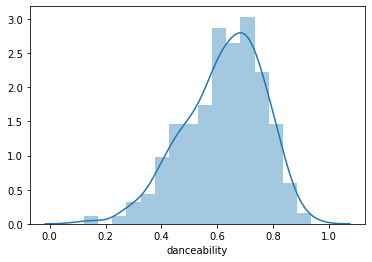

The mean is 0.623856353591161
The median is 0.639


In [5]:
# print a histogram with Seaborn, showing the overall curve
sns.distplot(pcdf["danceability"])
plt.show()

# compute mean and median
dancemean = np.mean(pcdf["danceability"])
dancemedian = np.median(pcdf["danceability"])
print("The mean is", dancemean)
print("The median is", dancemedian)

We have nearly a bell curve, if skewed a bit left by some outliers. The mean and median are both around 0.62, so on the dancier side.

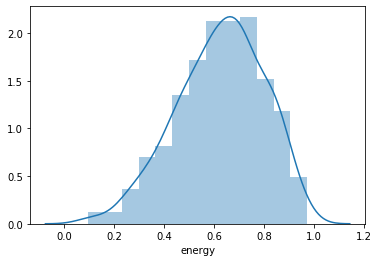

The mean is 0.6243290055248618
The median is 0.6415


In [6]:
# print a histogram with Seaborn, showing the overall curve
sns.distplot(pcdf["energy"])
plt.show()

# Calculate mean and median
energymean = np.mean(pcdf["energy"])
energymedian = np.median(pcdf["energy"])
print("The mean is", energymean)
print("The median is", energymedian)

Energy is the same as Danceability: nearly a bell curve, if skewed a bit left by some outliers.

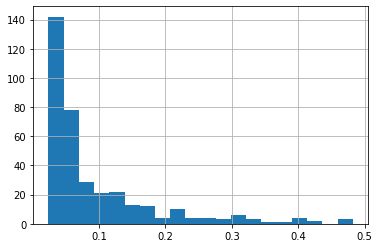

The mean is 0.09426657458563541
The median is 0.057050000000000003


In [7]:
# Plot a histogram for "speechiness"
pcdf["speechiness"].hist(bins='fd')
plt.show()

# sns.distplot(pcdf["speechiness"])

# Calculate mean and median
speechmean = np.mean(pcdf["speechiness"])
speechmedian = np.median(pcdf["speechiness"])
print("The mean is", speechmean)
print("The median is", speechmedian)

This non-bell distribution tells us that most songs are not very "speechy". This makes sense since there are no "spoken word" songs.

The mean is 0.2043807794751382
The median is 0.1045


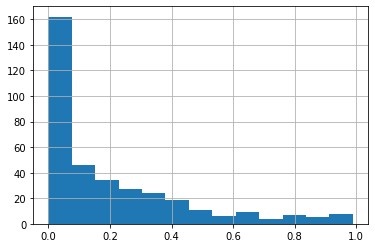

In [8]:
#print a histogram for "acousticness"
pcdf["acousticness"].hist(bins='fd')

# Calculate mean and median
acoustimean = np.mean(pcdf["acousticness"])
acoustimedian = np.median(pcdf["acousticness"])
print("The mean is", acoustimean)
print("The median is", acoustimedian)

This non-bell distribution tells us that most songs are very low on "acousticness", meaning they're not very acoustic - they're more electric or electronic.

The mean is 0.07181200817679564
The median is 3.86e-05


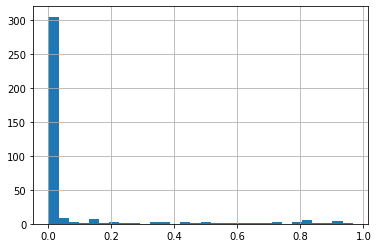

In [9]:
#print a histogram for "instrumentalness"
pcdf["instrumentalness"].hist(bins=30)

# Calculate mean and median
instimean = np.mean(pcdf["instrumentalness"])
instimedian = np.median(pcdf["instrumentalness"])
print("The mean is", instimean)
print("The median is", instimedian)

This highly non-bell-shaped distribution tells us that most there are just a few instrumental-leaning songs on the PopConnoisseur Playlist. Anecdotally there are no fully instrumental tracks.

The mean is 0.43790552486187834
The median is 0.419


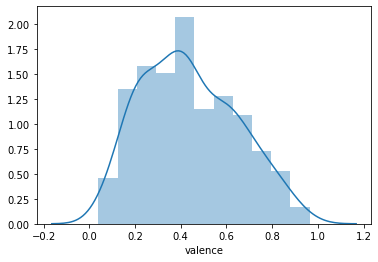

In [10]:
#print a histogram for "valence"
# pcdf["valence"].hist(bins=30)

# print a histogram with Seaborn, showing the overall curve
sns.distplot(pcdf["valence"])

# Calculate mean and median
valmean = np.mean(pcdf["valence"])
valmedian = np.median(pcdf["valence"])
print("The mean is", valmean)
print("The median is", valmedian)

The valence, or "happy/sadness" of the songs, is a bell curve around the middle of the range, so most songs are neither notably happy or sad.

Let's see how many different values for time signature there are. Mostly this is to check the data quality.

In [11]:
pcdf.time_signature.value_counts()

4    339
3     14
5      7
1      2
Name: time_signature, dtype: int64

I don't like many songs in 5/4 time so this seems odd. Let's investigate by viewing those...

In [12]:
pcdf[pcdf.time_signature == 5]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
18,0.586,0.6500,1,-5.912,1,0.3350,0.131000,0.000000,0.0738,0.7010,129.239,audio_features,7jhS5XE7nmgcsTbkcqzTc7,spotify:track:7jhS5XE7nmgcsTbkcqzTc7,https://api.spotify.com/v1/tracks/7jhS5XE7nmgc...,https://api.spotify.com/v1/audio-analysis/7jhS...,227173,5
22,0.294,0.0951,5,-12.915,1,0.0373,0.957000,0.000032,0.1040,0.1470,167.241,audio_features,5KmA68mgrZX815hICp1IVP,spotify:track:5KmA68mgrZX815hICp1IVP,https://api.spotify.com/v1/tracks/5KmA68mgrZX8...,https://api.spotify.com/v1/audio-analysis/5KmA...,192333,5
31,0.466,0.6660,1,-6.770,1,0.1690,0.000199,0.019500,0.0803,0.3370,113.935,audio_features,3LRddJIw2ymm1CHIO9xlkC,spotify:track:3LRddJIw2ymm1CHIO9xlkC,https://api.spotify.com/v1/tracks/3LRddJIw2ymm...,https://api.spotify.com/v1/audio-analysis/3LRd...,196117,5
35,0.344,0.4180,3,-7.811,1,0.0423,0.743000,0.000000,0.1020,0.0766,99.962,audio_features,4G9mDvbxpmMNFNXXlLbEot,spotify:track:4G9mDvbxpmMNFNXXlLbEot,https://api.spotify.com/v1/tracks/4G9mDvbxpmMN...,https://api.spotify.com/v1/audio-analysis/4G9m...,219893,5
43,0.482,0.4770,10,-8.444,0,0.0503,0.020100,0.000000,0.2510,0.3790,117.850,audio_features,0rlFL6bxIWcCn9gk9GExFA,spotify:track:0rlFL6bxIWcCn9gk9GExFA,https://api.spotify.com/v1/tracks/0rlFL6bxIWcC...,https://api.spotify.com/v1/audio-analysis/0rlF...,182834,5
247,0.122,0.5490,0,-7.389,1,0.0362,0.630000,0.015800,0.0908,0.2010,67.327,audio_features,4XmwxMblrHFWIXurJmFWD3,spotify:track:4XmwxMblrHFWIXurJmFWD3,https://api.spotify.com/v1/tracks/4XmwxMblrHFW...,https://api.spotify.com/v1/audio-analysis/4Xmw...,246787,5
315,0.544,0.9160,1,-2.742,1,0.2310,0.068700,0.000000,0.3520,0.4540,108.257,audio_features,2QZBf5Rq9bCHFt7j95G4w2,spotify:track:2QZBf5Rq9bCHFt7j95G4w2,https://api.spotify.com/v1/tracks/2QZBf5Rq9bCH...,https://api.spotify.com/v1/audio-analysis/2QZB...,212290,5


A quick listen shows all these are actually in 4/4 time so this is a case of incorrect metadata. Let's correct them:

In [13]:
pcdf.loc[pcdf.time_signature == 5,['time_signature']] = 4

On the whole, the above data seems in accordance with what I know about the songs themselves, so I feel justified in saying that if this sample represents the overall level of Spotify data, then Spotify's data, while not being perfect, is reasonably trustworthy.

Let's drop the columns we don't need:

In [14]:
pcdf.drop(['key','mode','track_href','instrumentalness','analysis_url','time_signature','uri','id','type'],axis=1,inplace=True)

In [15]:
pcdf.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_ms
0,0.462,0.715,-6.829,0.0454,0.11800,0.0592,0.237,99.763,166788
1,0.678,0.607,-7.190,0.0750,0.17400,0.0788,0.445,91.973,204418
2,0.623,0.840,-3.944,0.0799,0.04730,0.1070,0.788,162.062,251627
3,0.555,0.423,-6.232,0.0440,0.79900,0.1120,0.257,137.044,202147
4,0.420,0.879,-4.916,0.0568,0.00729,0.1800,0.432,128.913,279000


Much better.

# Checking correlation.

Let's directly check correlations:

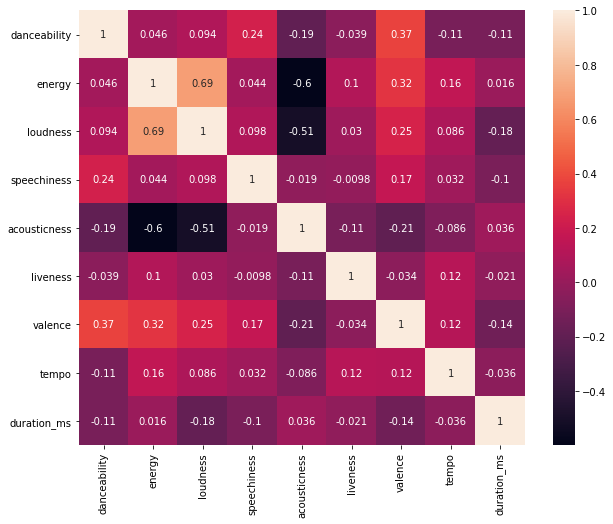

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(pcdf.corr(),annot=True)

We don't see any directly correlated columns, which indicates that collinearity isn't a problem.

# PopConnoisseur Observations

Some observations about the songs on the PopConnoisseur Playlist: 
1. fairly loud
2. not very "speechy"
3. not very "live"
4. midtempo: mostly between 90 and 140 bpm
5. mostly around the same length - 3-4 min
6. generally low-valence, which means "gloomy" or "negative"
7. some correlation between loudness and energy, which makes sense
8. negative correlation between acousticness and both energy and loudness, which again makes sense.

# Billboard Hot 100

Now let's look at the Billboard Hot 100:

In [17]:
bbdf.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.672,0.855,9,-3.764,1,0.0397,0.02100,0.000000,0.3230,0.646,123.056,audio_features,24ySl2hOPGCDcxBxFIqWBu,spotify:track:24ySl2hOPGCDcxBxFIqWBu,https://api.spotify.com/v1/tracks/24ySl2hOPGCD...,https://api.spotify.com/v1/audio-analysis/24yS...,182200,4
1,0.822,0.743,10,-4.772,0,0.2800,0.01600,0.000000,0.1270,0.636,84.459,audio_features,5v4GgrXPMghOnBBLmveLac,spotify:track:5v4GgrXPMghOnBBLmveLac,https://api.spotify.com/v1/tracks/5v4GgrXPMghO...,https://api.spotify.com/v1/audio-analysis/5v4G...,242001,4
2,0.746,0.690,11,-7.956,1,0.1640,0.24700,0.000000,0.1010,0.497,89.977,audio_features,7ytR5pFWmSjzHJIeQkgog4,spotify:track:7ytR5pFWmSjzHJIeQkgog4,https://api.spotify.com/v1/tracks/7ytR5pFWmSjz...,https://api.spotify.com/v1/audio-analysis/7ytR...,181733,4
3,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
4,0.856,0.641,11,-4.640,0,0.2040,0.11900,0.000005,0.4270,0.745,111.004,audio_features,11VApNQCWLJdzxWrlmwzUa,spotify:track:11VApNQCWLJdzxWrlmwzUa,https://api.spotify.com/v1/tracks/11VApNQCWLJd...,https://api.spotify.com/v1/audio-analysis/11VA...,206221,4


In [18]:
bbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      100 non-null    float64
 1   energy            100 non-null    float64
 2   key               100 non-null    int64  
 3   loudness          100 non-null    float64
 4   mode              100 non-null    int64  
 5   speechiness       100 non-null    float64
 6   acousticness      100 non-null    float64
 7   instrumentalness  100 non-null    float64
 8   liveness          100 non-null    float64
 9   valence           100 non-null    float64
 10  tempo             100 non-null    float64
 11  type              100 non-null    object 
 12  id                100 non-null    object 
 13  uri               100 non-null    object 
 14  track_href        100 non-null    object 
 15  analysis_url      100 non-null    object 
 16  duration_ms       100 non-null    int64  
 17

As we go, it's worth bearing in mind that the Billboard Hot 100 is just 100 songs vs 362 for PopConnoisseur.

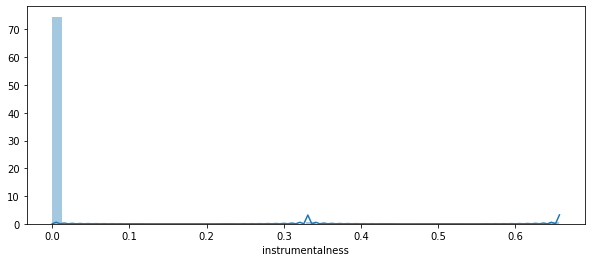

In [19]:
plt.figure(figsize=(10,4))
sns.distplot(bbdf['instrumentalness'])

There are virtually no instrumentally-leaning songs on the billboard Hot 100!

How many different values for time signature are there?

In [20]:
bbdf.time_signature.value_counts()

4    97
3     2
1     1
Name: time_signature, dtype: int64

In [21]:
# Sure enough, if you check out the 1/4 song:
bbdf[bbdf.time_signature == 1]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
42,0.778,0.559,6,-7.109,0,0.0776,0.128,0.0,0.399,0.678,129.989,audio_features,7aiClxsDWFRQ0Kzk5KI5ku,spotify:track:7aiClxsDWFRQ0Kzk5KI5ku,https://api.spotify.com/v1/tracks/7aiClxsDWFRQ...,https://api.spotify.com/v1/audio-analysis/7aiC...,185093,1


...it's "Hot Girl Bummer", which is actually 4/4 time. We won't change it this time, since we'll be dropping that column. Otherwise the playlist is mostly 4/4 time, which sounds right for pop music. Let's drop the columns we don't need:

In [22]:
bbdf.drop(['key','mode','track_href','instrumentalness','analysis_url','time_signature','uri','id','type'],axis=1,inplace=True)

Again, let's directly check correlations:

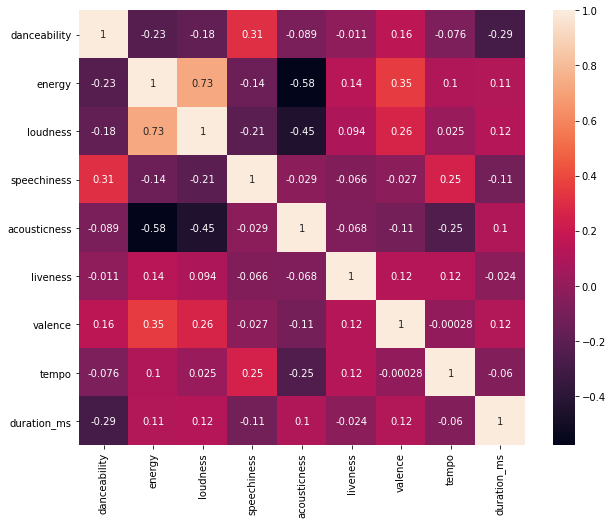

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(bbdf.corr(),annot=True)

# PopConnoisseur Observations

Some observations of songs on the Billboard Hot 100:
1. fairly loud
2. not very "speechy"
3. not very "live"
4. midtempo: mostly between 90 and 140 bpm
5. a wider variety of tempos than the PopConnoisseur playlist
6. valence mostly in the middle
7. again, some correlation between loudness and energy, which makes sense
8. negative correlation again between acousticness and both energy and loudness
9. no real correlation between energy and danceability, which is interesting...

# Comparing The Two Playlists

Let's check the average values for the two playlists:

In [24]:
pcdf.mean()

danceability         0.623856
energy               0.624329
loudness            -6.808097
speechiness          0.094267
acousticness         0.204381
liveness             0.160218
valence              0.437906
tempo              118.237229
duration_ms     222684.541436
dtype: float64

In [25]:
bbdf.mean()

danceability         0.727470
energy               0.620790
loudness            -6.537780
speechiness          0.128553
acousticness         0.193882
liveness             0.187433
valence              0.499516
tempo              120.670870
duration_ms     190449.530000
dtype: float64

Some observations:

1. Billboard Hot 100 (bbdf) is more danceable.
2. Energy, loudness, liveness, acousticness and tempo roughly comparable.
3. PopConnoisseur (pcdf) has longer songs.

Mostly, however, there is quite a lot of overlap in these data sets. Let's compare them directly:

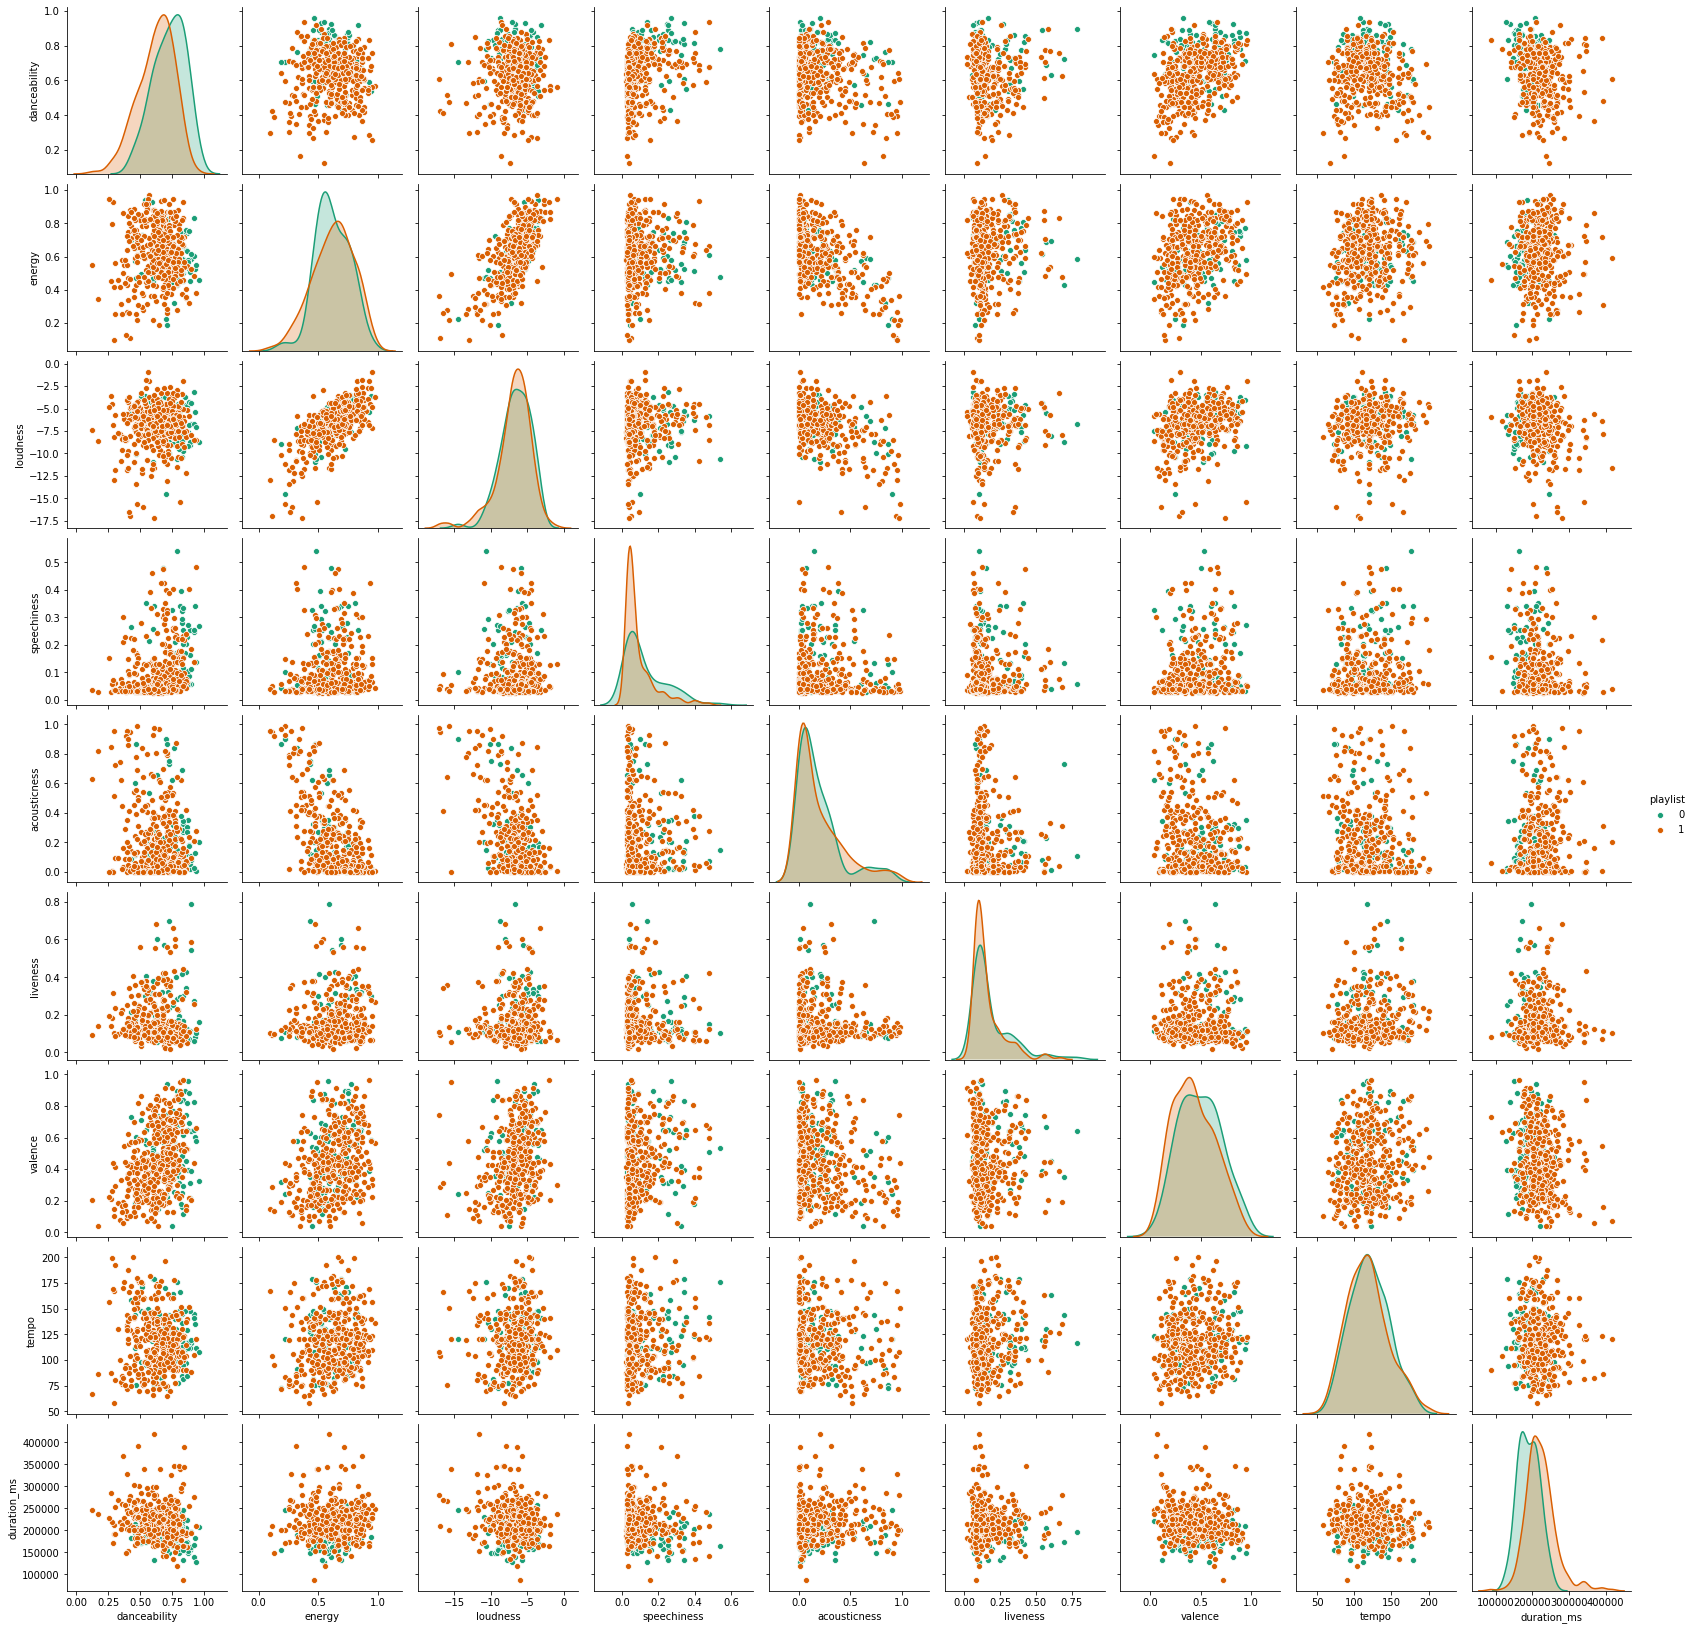

In [26]:
alldf = pd.read_excel('alldata.xlsx', usecols = "B:S")
sns.pairplot(alldf, hue = 'playlist', palette='Dark2')

# Adding A Third Playlist

Let's try adding in something less similar: Spotify's Ambient Relaxation playlist. You can hear it here:

https://open.spotify.com/playlist/37i9dQZF1DX3Ogo9pFvBkY?si=33qUwYElThG7D5sk83CJlw

I grabbed the songs, then features using Spotipy, saved it to 'ar_data.xlsx', loaded it as ardf, then dropped the extra columns.

In [27]:
ardf = pd.read_excel('ar_data.xlsx', usecols = "B:S")
ardf.drop(['key','mode','track_href','instrumentalness','analysis_url','time_signature','uri','type','id'],axis=1,inplace=True)

Let's create a new column for merging the two Pop playlists with the Ambient Relaxation Playlist.

In [28]:
ardf['playlist']=2

Now let's merge the original two playlists with the new one:

In [29]:
frames = [alldf, ardf]
alldf2 = pd.concat(frames)

...and run a pairplot separated by playlist:

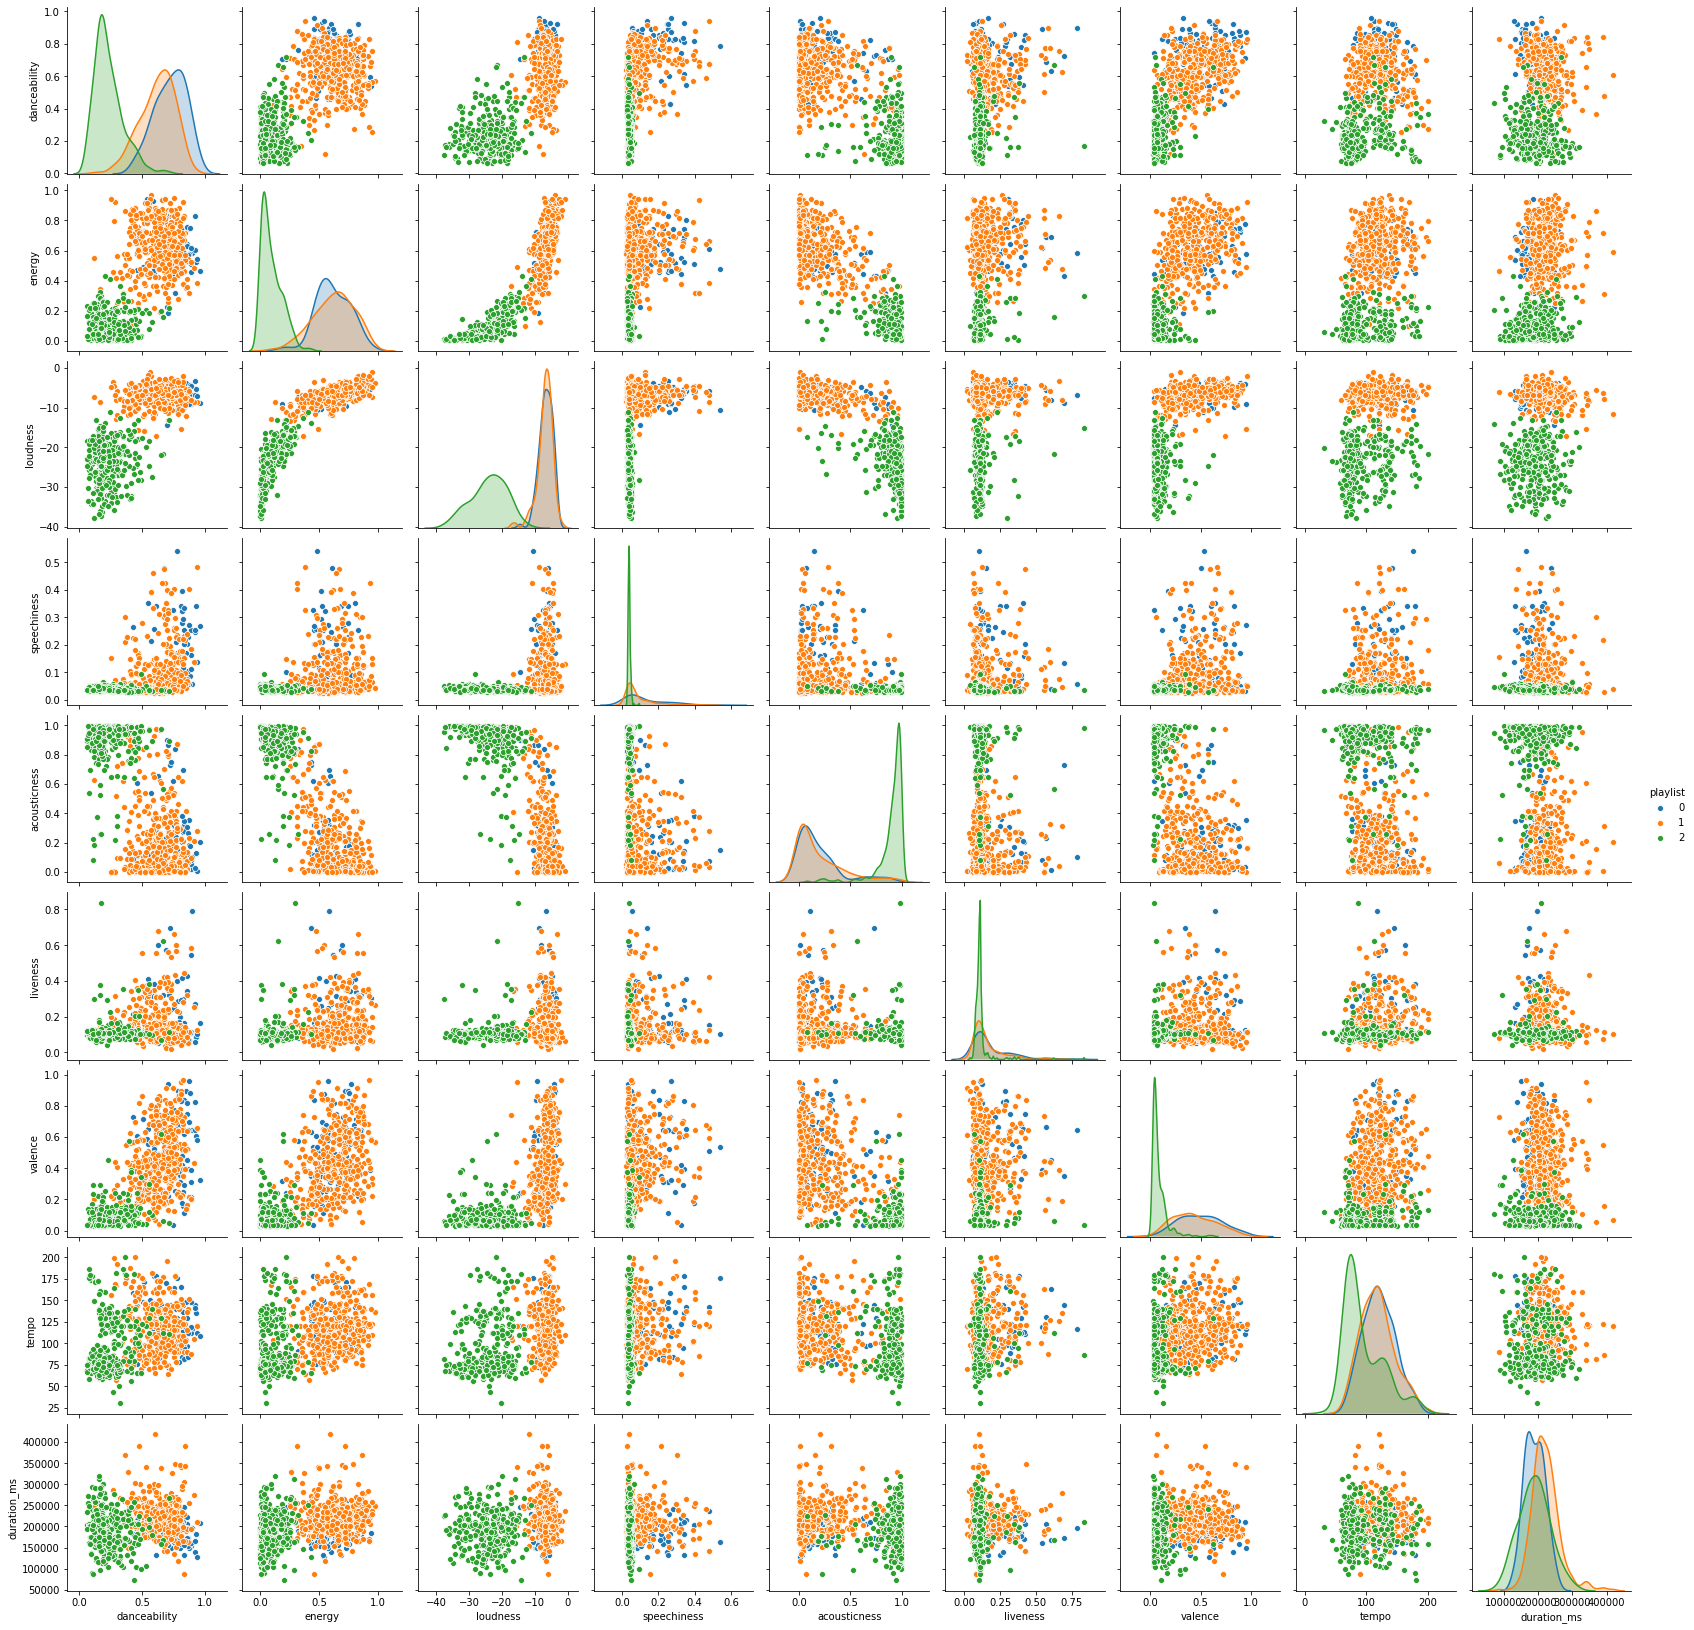

In [30]:
sns.pairplot(alldf2, hue='playlist')

Here we have a much more drastic difference! There is very clear separation in most features as the Ambient Relaxation playlist, in green.

Let's compare danceability of the three playlists. Bear in mind there are fewer Billboard songs.

Text(0.5, 0, 'Danceability')

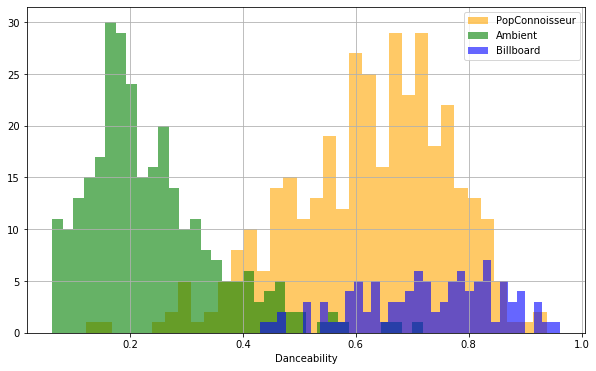

In [31]:
plt.figure(figsize=(10,6))

alldf2[alldf2['playlist']==1]['danceability'].hist(bins=35, color='orange',label='PopConnoisseur',alpha=0.6)
alldf2[alldf2['playlist']==2]['danceability'].hist(bins=35, color='green',label='Ambient',alpha=0.6)
alldf2[alldf2['playlist']==0]['danceability'].hist(bins=35, color='blue',label='Billboard',alpha=0.6)

plt.legend()
plt.xlabel('Danceability')

Alternatively to see just the distribution of values I will add "density=True" to put them all at the same scale:

Text(0.5, 0, 'Danceability')

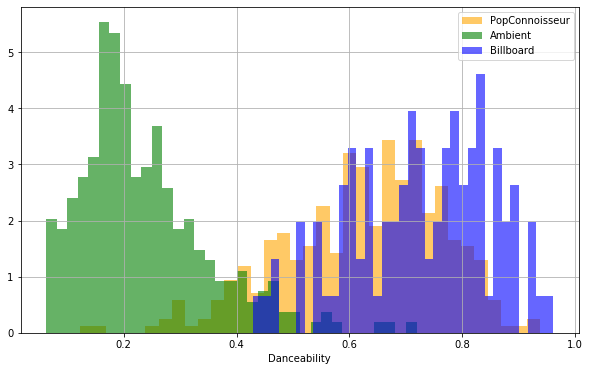

In [32]:
plt.figure(figsize=(10,6))

alldf2[alldf2['playlist']==1]['danceability'].hist(bins=35, color='orange',label='PopConnoisseur',alpha=0.6, density=True)
alldf2[alldf2['playlist']==2]['danceability'].hist(bins=35, color='green',label='Ambient',alpha=0.6, density=True)
alldf2[alldf2['playlist']==0]['danceability'].hist(bins=35, color='blue',label='Billboard',alpha=0.6, density=True)

plt.legend()
plt.xlabel('Danceability')

Let's compare acousticness of the three playlists.

Text(0.5, 0, 'Acousticness')

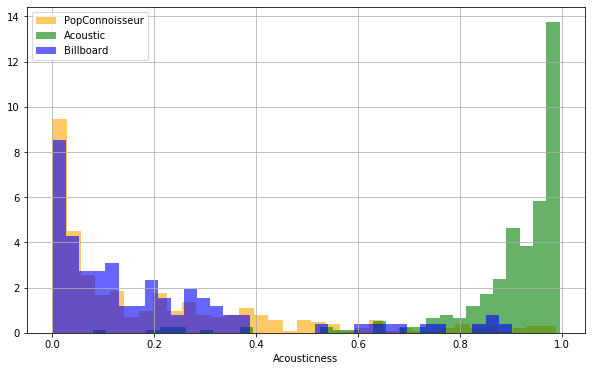

In [33]:
plt.figure(figsize=(10,6))
alldf2[alldf2['playlist']==1]['acousticness'].hist(bins=35, density=True, color='orange',label='PopConnoisseur',alpha=0.6)
alldf2[alldf2['playlist']==2]['acousticness'].hist(bins=35, density=True, color='green',label='Acoustic',alpha=0.6)
alldf2[alldf2['playlist']==0]['acousticness'].hist(bins=35, density=True, color='blue',label='Billboard',alpha=0.6)
plt.legend()
plt.xlabel('Acousticness')

We can see that PopConn and Billboard align again at the same end of the spectrum.

Overall there's not a big enough difference between Billboard and PopConn so let's create a new column merging both.

In [34]:
alldf2['pl2'] = [0 if x == 2 else 1 for x in alldf2['playlist']]

# Machine Learning With Tensorflow

Now let's do some Machine Learning. 

Let's train/test/split to predict the loudness value.

In [35]:
from sklearn.model_selection import train_test_split

For X let's use two columns that have the strongest negative correlation.

In [36]:
X = alldf2[['energy','acousticness']].values
y = alldf2['loudness'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Let's scale the data - but JUST the X data! - for the neural network:

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [39]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now it's time to actually create the neural network!

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Let's define a callback function that cancels when a loss of 5 is reached:

In [41]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<5):
      print("\nReached loss of 5 so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

We'll use Adam as our optimizer and MSE as our error metric.

In [42]:
model = Sequential()

model.add(Dense(32,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Then let's run it!

In [43]:
model.fit(x=X_train, y=y_train,epochs=250, callbacks=[callbacks])

Epoch 1/250
17/17 [==============================] - 0s 1ms/step - loss: 267.7250
Epoch 2/250
17/17 [==============================] - 0s 1ms/step - loss: 266.7924
Epoch 3/250
17/17 [==============================] - 0s 2ms/step - loss: 265.5957
Epoch 4/250
17/17 [==============================] - 0s 2ms/step - loss: 263.8360
Epoch 5/250
17/17 [==============================] - 0s 3ms/step - loss: 261.3427
Epoch 6/250
17/17 [==============================] - 0s 1ms/step - loss: 257.6685
Epoch 7/250
17/17 [==============================] - 0s 2ms/step - loss: 252.2147
Epoch 8/250
17/17 [==============================] - 0s 2ms/step - loss: 244.0553
Epoch 9/250
17/17 [==============================] - 0s 2ms/step - loss: 231.2596
Epoch 10/250
17/17 [==============================] - 0s 1ms/step - loss: 214.0890
Epoch 11/250
17/17 [==============================] - 0s 2ms/step - loss: 191.8575
Epoch 12/250
17/17 [==============================] - 0s 2ms/step - loss: 165.2258
Epoch 13/250


17/17 [==============================] - 0s 1ms/step - loss: 10.8960
Epoch 101/250
17/17 [==============================] - 0s 1ms/step - loss: 10.7868
Epoch 102/250
17/17 [==============================] - 0s 2ms/step - loss: 10.6871
Epoch 103/250
17/17 [==============================] - 0s 1ms/step - loss: 10.6746
Epoch 104/250
17/17 [==============================] - 0s 1ms/step - loss: 10.6315
Epoch 105/250
17/17 [==============================] - 0s 1ms/step - loss: 10.4269
Epoch 106/250
17/17 [==============================] - 0s 1ms/step - loss: 10.3716
Epoch 107/250
17/17 [==============================] - 0s 1ms/step - loss: 10.2825
Epoch 108/250
17/17 [==============================] - 0s 2ms/step - loss: 10.2768
Epoch 109/250
17/17 [==============================] - 0s 1ms/step - loss: 10.2472
Epoch 110/250
17/17 [==============================] - 0s 2ms/step - loss: 10.0636
Epoch 111/250
17/17 [==============================] - 0s 2ms/step - loss: 10.0055
Epoch 112/250
17/1

17/17 [==============================] - 0s 2ms/step - loss: 8.2624
Epoch 200/250
17/17 [==============================] - 0s 2ms/step - loss: 8.1888
Epoch 201/250
17/17 [==============================] - 0s 2ms/step - loss: 8.2147
Epoch 202/250
17/17 [==============================] - 0s 2ms/step - loss: 8.2316
Epoch 203/250
17/17 [==============================] - 0s 2ms/step - loss: 8.2553
Epoch 204/250
17/17 [==============================] - 0s 2ms/step - loss: 8.2110
Epoch 205/250
17/17 [==============================] - 0s 2ms/step - loss: 8.2215
Epoch 206/250
17/17 [==============================] - 0s 2ms/step - loss: 8.2654
Epoch 207/250
17/17 [==============================] - 0s 2ms/step - loss: 8.3104
Epoch 208/250
17/17 [==============================] - 0s 2ms/step - loss: 8.2606
Epoch 209/250
17/17 [==============================] - 0s 1ms/step - loss: 8.1913
Epoch 210/250
17/17 [==============================] - 0s 2ms/step - loss: 8.1987
Epoch 211/250
17/17 [=========

Some experimenting:
- I tried with up to 1000 epochs but 250 was more than enough.
- Two layers was good but four was better.
- 'adam' just nudged ahead of 'rmsprop' for optimizer.
- I set callback at a loss of 5, just for kicks, but didn't end up hitting it.
- I tried 128 neurons in that first layer but it was overkill - 32 is plenty.

Let's plot our loss:

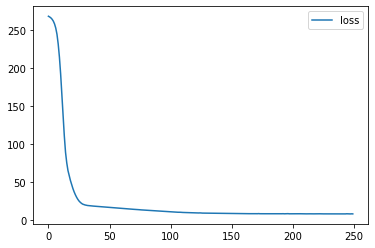

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

Let's evaluate the Mean Squared Error:

In [45]:
model.evaluate(X_train,y_train,verbose=0)

8.080207824707031

Let's get the actual data:

In [46]:
test_predictions = model.predict(X_test)
test_predictions

array([[-28.745113 ],
       [ -5.328906 ],
       [ -7.118492 ],
       [ -6.666939 ],
       [ -6.883666 ],
       [-27.297092 ],
       [ -5.5382423],
       [ -4.336478 ],
       [-23.958878 ],
       [-27.826517 ],
       [ -5.809164 ],
       [ -6.083273 ],
       [ -4.6689253],
       [-25.74231  ],
       [ -4.0622425],
       [ -4.849208 ],
       [ -7.752141 ],
       [ -7.238266 ],
       [ -4.504509 ],
       [-26.985771 ],
       [-25.5901   ],
       [-23.691172 ],
       [ -5.655751 ],
       [ -8.343629 ],
       [ -6.506654 ],
       [-22.958027 ],
       [ -4.6032   ],
       [ -4.1503477],
       [ -5.2603016],
       [ -9.7764225],
       [ -5.9825735],
       [-27.854599 ],
       [ -8.396596 ],
       [ -7.25165  ],
       [ -7.226966 ],
       [-10.096449 ],
       [ -4.197859 ],
       [ -6.9480543],
       [ -8.508948 ],
       [-20.252422 ],
       [ -7.7276154],
       [-26.504292 ],
       [ -4.493685 ],
       [-13.437679 ],
       [ -5.7718697],
       [-2

We'll need to reshape the data to fit, then we can compare predictions vs actual Y values:

In [47]:
test_predictions = pd.Series(test_predictions.reshape(226,))
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test True Y','Model Predictions']
pred_df

,Test True Y,Model Predictions
0,-31.238,-28.745113
1,-5.131,-5.328906
2,-8.079,-7.118492
3,-8.530,-6.666939
4,-4.924,-6.883666
...,...,...
221,-32.056,-27.804417
222,-5.810,-10.381444
223,-4.258,-5.358045
224,-7.503,-7.484568


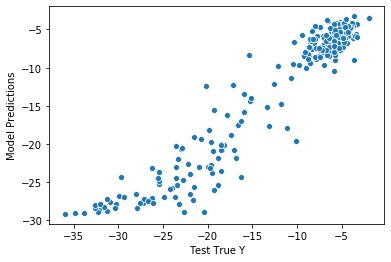

In [48]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

Not perfect - a straight diagonal line - but in the right general direction. More data would probably help.

Let's check the Mean Absolute Error (MAE).

In [49]:
from sklearn.metrics import mean_absolute_error

In [50]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

1.939183072647162

# Machine Learning With Support Vector Machines

Let's try a new model, using Support Vector Machines (SVC):

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

We can train/test/split to predict the playlist value, i.e. which playlist is a given song in.

In [52]:
model = SVC()

That means we have to redefine X to all columns EXCEPT 'playlist' and y to just 'playlist':

In [53]:
X = alldf2.drop('pl2',axis=1)
y = alldf2['pl2']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Model Evaluation

In [56]:
predictions = model.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

Let's check out a Confusion Matrix:

In [58]:
print(confusion_matrix(y_test, predictions))

[[ 18  67]
 [  4 137]]


This is not that impressive but let's try a Classification Report.

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.21      0.34        85
           1       0.67      0.97      0.79       141

    accuracy                           0.69       226
   macro avg       0.74      0.59      0.57       226
weighted avg       0.73      0.69      0.62       226



# Machine Learning With Decision Trees/Random Forests

At this point, in the real world, I tried a GridSearch and got even worse results, so I moved on to Decision Trees/Random Forests. Let's try Decision Trees first:

In [60]:
from sklearn.tree import DecisionTreeClassifier

We'll have to redefine X and y, then train/test/split again:

In [61]:
alldf2['pl2'].value_counts()

1    462
0    289
Name: pl2, dtype: int64

In [62]:
X = alldf2.drop('pl2',axis=1)
y = alldf2['pl2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [63]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
predictions = dtree.predict(X_test)

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00       147

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



In [66]:
print(confusion_matrix(y_test,predictions))

[[ 79   0]
 [  0 147]]


Perfect results! That's pretty impressive! Let's try the same thing with just the two original pop playlists:

In [67]:
X = alldf.drop('playlist',axis=1)
y = alldf['playlist']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [68]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        28
           1       0.86      0.79      0.83       111

    accuracy                           0.73       139
   macro avg       0.62      0.65      0.63       139
weighted avg       0.77      0.73      0.75       139

[[14 14]
 [23 88]]


Definitely not bad, and the confusion matrix looks passable.

Let's try Random Forests:

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [70]:
X = alldf2.drop('pl2',axis=1)
y = alldf2['pl2']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [72]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
rfc_pred = rfc.predict(X_test)

In [74]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00       140

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



In [75]:
print(confusion_matrix(y_test,rfc_pred))

[[ 86   0]
 [  0 140]]


Again, Random Forests makes it look easy!

Let's try that with the original two playlists:

In [76]:
X = alldf.drop('playlist',axis=1)
y = alldf['playlist']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.70      0.23      0.34        31
           1       0.81      0.97      0.89       108

    accuracy                           0.81       139
   macro avg       0.76      0.60      0.61       139
weighted avg       0.79      0.81      0.76       139

[[  7  24]
 [  3 105]]


This f1-score and confusion matrix result is a bit better across the board. There has been a lot written about adjusting Random Forect hyperparameters. I've just gone with defaults/"typical" values here, but it could be worth some experimentation in the future, along the lines of this article:

https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

Thanks for reading this far! 